<a href="https://colab.research.google.com/github/Lance-Gamier/Physics_Informed_Neural_Networks/blob/main/PINN_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics Informed Neural Networks (PINN) for Ordinary Differential Equations (ODE)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
class PINN(tf.keras.Model):

  def __init__(self):
    super(PINN, self).__init__()
    self.hidden1 = tf.keras.layers.Dense(20, activation = 'tanh')
    self.hidden2 = tf.keras.layers.Dense(20, activation = 'tanh')
    self.out = tf.keras.layers.Dense(1)

  def call(self, x):
    x = self.hidden1(x)
    x = self.hidden2(x)
    return self.out(x)

In [ ]:
def train(model, epochs = 1000):
  for epoch in range(epochs):
    with tf.GradientTape() as tape:
      x_train = tf.linspace(0.0, 1.0, num = 100)[:, tf.newaxis]
      x_train = tf.convert_to_tensor(x_train, dtype = tf.float32)
      u_pred = model(x_train)
      loss = loss_fn(x_train, u_pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if epoch % 100 == 0:
      print(f'Epoch {epoch}, loss: {loss.numpy()}')

Example 1

In [ ]:
def loss_fn(x, u_pred):
    with tf.GradientTape() as tape:
        tape.watch(x)
        u_pred = model(x)
        u_x = tape.gradient(u_pred, x)  # Compute the gradient of u_pred w.r.t. x

    # Define the residual of the PDE
    f = u_x + u_pred
    # Boundary condition loss
    boundary_loss = tf.square(u_pred[0] - 1.0)
    # Total loss
    total_loss = tf.reduce_mean(tf.square(f)) + tf.reduce_mean(boundary_loss)
    return total_loss

In [ ]:
model = PINN()

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [ ]:
train(model)

Epoch 0, loss: 1.1150039434432983
Epoch 100, loss: 0.03515108302235603
Epoch 200, loss: 0.021997252479195595
Epoch 300, loss: 0.00570422550663352
Epoch 400, loss: 0.003113860497251153
Epoch 500, loss: 0.0025600832886993885
Epoch 600, loss: 0.0019937914330512285
Epoch 700, loss: 0.0014449667651206255
Epoch 800, loss: 0.0009590417030267417
Epoch 900, loss: 0.0005809224094264209


In [ ]:
x_test = np.linspace(0.0, 1.0, 100)[:, np.newaxis]
x_test = tf.convert_to_tensor(x_test, dtype = tf.float32)
u_pred = model(x_test).numpy()

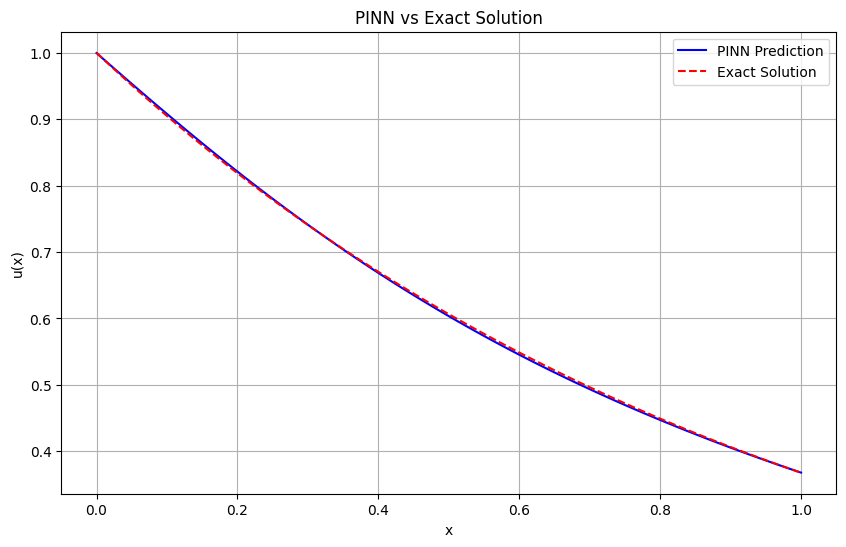

In [ ]:
u_exact = np.exp(-x_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_test, u_pred, label='PINN Prediction', color='blue')
plt.plot(x_test, u_exact, '--', label='Exact Solution', color='red')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('PINN vs Exact Solution')
plt.legend()
plt.grid()
plt.show()

Example 2

In [ ]:
def loss_fn(x, u_pred):
    with tf.GradientTape() as tape:
        tape.watch(x)
        u_pred = model(x)
        u_x = tape.gradient(u_pred, x)  # Compute the gradient of u_pred w.r.t. x

    # Define the residual of the PDE
    f = u_x - u_pred
    # Boundary condition loss
    boundary_loss = tf.square(u_pred[0] - 1.0)
    # Total loss
    total_loss = tf.reduce_mean(tf.square(f)) + tf.reduce_mean(boundary_loss)
    return total_loss

In [ ]:
train(model)

Epoch 0, loss: 1.7315685749053955
Epoch 100, loss: 0.12365801632404327
Epoch 200, loss: 0.04815252870321274
Epoch 300, loss: 0.02681279182434082
Epoch 400, loss: 0.02033611387014389
Epoch 500, loss: 0.015669522807002068
Epoch 600, loss: 0.011978333815932274
Epoch 700, loss: 0.009240995161235332
Epoch 800, loss: 0.007334650959819555
Epoch 900, loss: 0.00602683424949646


In [ ]:
x_test = np.linspace(0.0, 1.0, 100)[:, np.newaxis]
x_test = tf.convert_to_tensor(x_test, dtype = tf.float32)
u_pred = model(x_test).numpy()

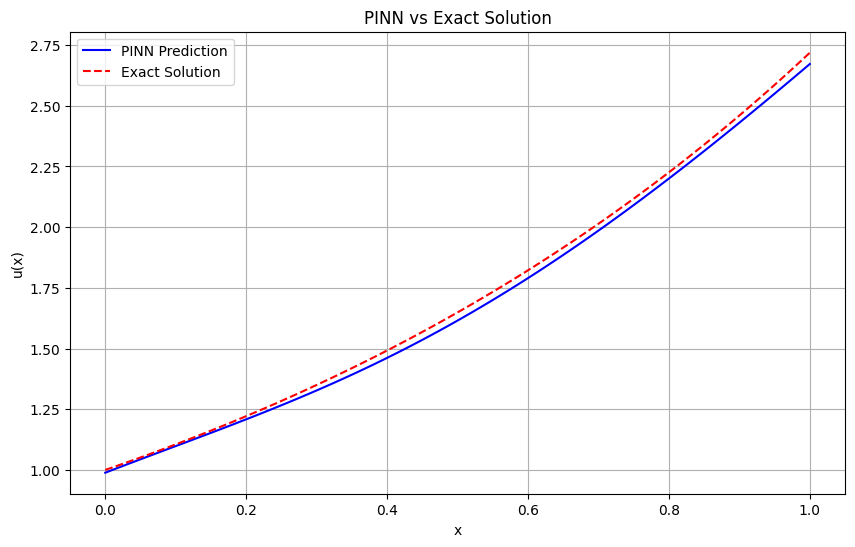

In [ ]:
u_exact = np.exp(x_test)  # Example; update this with the correct solution

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_test, u_pred, label='PINN Prediction', color='blue')
plt.plot(x_test, u_exact, '--', label='Exact Solution', color='red')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('PINN vs Exact Solution')
plt.legend()
plt.grid()
plt.show()